<h1>Data Wrangling in Python </h1>

This work is the practice from <a href="https://www.kaggle.com/code/mafaisal007/data-wrangling-tutorial">Kaggle tutorial</a>. <br>
Some methods used here are not similar to the tutorial.

Table of contents
 - Reading the data set from the URL
 - Process dataframe headers
 - Identify and Handle missing values
 - Data Standardization
 - Binning
 - Indicator variable (or dummy variable)

## Import libraries

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

## 1. Reading the data set from the URL

Create filename as url

In [304]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

Read data to dataframe

In [305]:
df = pd.read_csv(filename)
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## 2. Process dataframe headers

Display headers

In [306]:
df.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.6', '168.8', '64.1', '48.8', '2548', 'dohc', 'four', '130',
       'mpfi', '3.47', '2.68', '9.0', '111', '5000', '21', '27', '13495'],
      dtype='object')

Redefine headers so that they are more meaningful.

In [307]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Replace current column headers with new headers

In [308]:
df.columns = headers
df.columns


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

Show dataframe again

In [309]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## 3. Identify and handle missing values

In this step, we will
 - Identify missing data
 - Deal with missing data
 - Correct data format

### 3.1. Identify missing values

#### 3.1.1. Convert "?" to NaN

A quick check can find that column "normalized-losses" has missing data, shown with "?".<br>
We will replace "?" with "Nan" (not a number) directly on df.<br>
 - numpy.nan is a constant in Numpy used to represent undefined or unrepresentable values.

In [310]:
# replace "?" to NaN directly on df
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


#### 3.1.2. Identify for missing data

Count NaN values under an entire DataFrame

In [311]:
df.isna()
# df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Create series of counts of missing data

In [312]:
# Series of count
missing_data = df.isna().sum()
missing_data

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Visualise counts of missing data

<AxesSubplot:ylabel='index'>

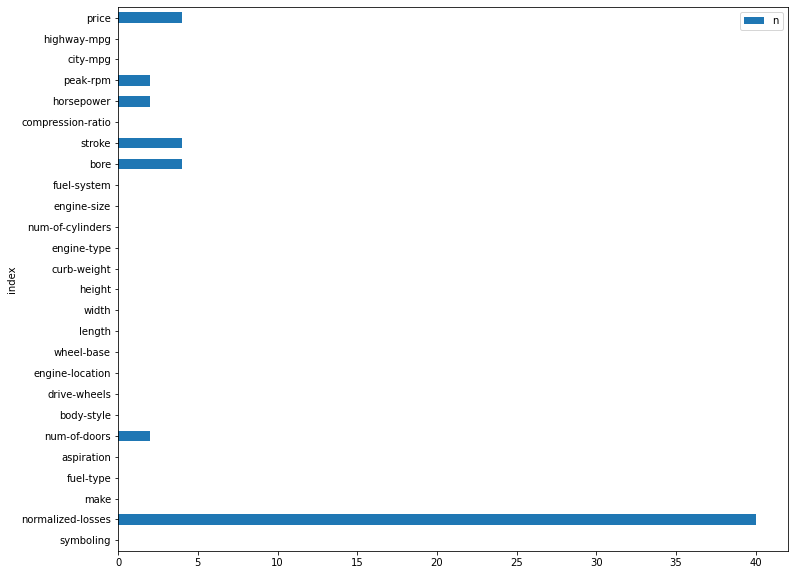

In [313]:
missing_data.reset_index(name="n").plot.barh(x='index', y='n', rot=0, figsize=(12, 10))

Displace columns' titles with missing data

In [314]:
missing_data_summary = missing_data[missing_data > 0]
missing_data_summary

normalized-losses    40
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

<AxesSubplot:ylabel='index'>

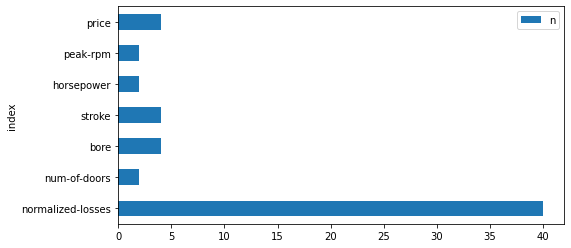

In [315]:
missing_data_summary.reset_index(name="n").plot.barh(x='index', y='n', rot=0, figsize=(8, 4))

### 3.2. Deal with missing data

Methods to deal with missing data:
<ol>
  <li>drop data
    <ol style="list-style-type:lower-alpha">
      <li>drop the whole row</li>
      <li>drop the whole column</li>
    </ol>
  </li>
  <li>replace data
    <ol style="list-style-type:lower-alpha">
      <li>replace it by mean</li>
      <li>replace it by frequency</li>
      <li>replace it based on other functions</li>
    </ol>
  </li>
</ol>

#### 3.2.1. Drop data

As there is no column with most entries being empty (filled with null values). So we choose to replace.

We drop 4 rows of missing data "price" because we want to predict price. 

In [316]:
df.dropna(subset=['price'], inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


It can be seen that index need to be reset because we delete four row. The last index is 203 but there are only 200 row, meaning last index is 199.

In [317]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


We are good now to move to replacing missing data.

#### 3.2.2. Replace data

Recall missing data

In [318]:
missing_data = df.isna().sum()
missing_data_summary = missing_data[missing_data > 0]
missing_data_summary

normalized-losses    36
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

We first analyse what means to replace. <br>

**Replace by mean:**
 - "normalized-losses", "stroke", "bore", "horsepower", "peak-rpm"
 
**Replace by frequency**
 - "num-of-doors" (Since four doors is most frequent)


#### 3.2.2.1 Replace "NaN" by mean value in "normalized-losses" column

In [319]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_norm_loss_rounded = round(avg_norm_loss, 2)
avg_norm_loss_rounded

122.0

In [320]:
df["normalized-losses"].replace(np.nan, avg_norm_loss_rounded, inplace=True)

#### 3.2.2.2 Replace "NaN" by mean value in "bore" column

In [321]:
avg_bore=df['bore'].astype('float').mean(axis=0)
avg_bore_rounded = round(avg_bore,0)
avg_bore_rounded

3.0

In [322]:
df["bore"].replace(np.nan, avg_bore_rounded, inplace=True)

#### 3.2.2.3 Replace "NaN" by mean value in "stroke" column

In [323]:
avg_stroke=df['bore'].astype('float').mean(axis=0)
avg_stroke_rounded = round(avg_stroke, 2)
avg_stroke_rounded

3.32

In [324]:
df["stroke"].replace(np.nan, avg_stroke_rounded, inplace=True)

#### 3.2.2.4 Replace "NaN" by mean value in "horsepower" column

In [325]:
avg_horsepower=df['horsepower'].astype('float').mean(axis=0)
avg_horsepower_rounded = round(avg_horsepower, 0)
avg_horsepower_rounded

103.0

In [326]:
df["horsepower"].replace(np.nan, avg_horsepower_rounded, inplace=True)

#### 3.2.2.5 Replace "NaN" by mean value in "peak-rpm" column

In [327]:
avg_peak_rpm=df['peak-rpm'].astype('float').mean(axis=0)
avg_peak_rpm_rounded = round(avg_peak_rpm, 2)
avg_horsepower_rounded

103.0

In [328]:
df["peak-rpm"].replace(np.nan, avg_horsepower_rounded, inplace=True)

#### 3.2.2.6 Replace "NaN" by frequency in "num-of-doors" column

Verify frequency of number of doors

In [329]:
df['num-of-doors'].value_counts()

four    113
two      85
Name: num-of-doors, dtype: int64

In [330]:
df['num-of-doors'].value_counts().idxmax()

'four'

Replace with frequency 'four'

In [331]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Data is good now without missing value

In [332]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### 3.3. Correct data format

Quote: "The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other). <br>
In Pandas, we use
 - .dtype() to check the data type
 - .astype() to change the data type"

In [333]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


We transpose the dataset to see datatype of columns.

In [334]:
df.head().transpose()

,0,1,2,3,4
symboling,3,1,2,2,2
normalized-losses,122.0,122.0,164,164,122.0
make,alfa-romero,alfa-romero,audi,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,four,four,two
body-style,convertible,hatchback,sedan,sedan,sedan
drive-wheels,rwd,rwd,fwd,4wd,fwd
engine-location,front,front,front,front,front
wheel-base,88.6,94.5,99.8,99.4,99.8


List the data types for each column

In [335]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

By comparing two dataset above, we can see that Columns whose datatype are not correct are 
 - normalized-losses:    should be int as original data has int format
 - bore, stroke, price:  should be float
 - horsepower, peak-rpm: should be int

We now convert data types to proper format:

In [336]:
df[["normalized-losses"]] =      df[["normalized-losses"]].astype("int")
df[["bore", "stroke", "price"]] =         df[["bore", "stroke", "price"]].astype("float")
df[["horsepower", "peak-rpm"]] = df[["horsepower", "peak-rpm"]].astype("int")

We now verify datatype conversion

In [337]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## 4. Data Standardization

"Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison."

As example, we transform "mpg" into "L/100km".  We can use the following formula: <br>
L/100km = 235.215 / mpg <br>
This formula is derived from the fact that 1 mile is approximately equal to 1.60934 kilometers, and 1 gallon is approximately equal to 3.78541 liters.

We can also convert measure from inch to cm for "wheel-base", "length", and more but we leave them as they are here.

#### Convert 'city-mpg' to 'city-L/100km'

We first convert values

In [338]:
df['city-mpg'] = (235/df["city-mpg"]).round(2)

We then change the title of column "city-mpg" to "city-L/100km"

In [339]:
df.rename(columns={"city-mpg": "city-L/100km"}, inplace=True)

#### Convert 'highway-mpg' to 'highway-L/100km'

In [340]:
df['highway-mpg'] = (235/df["highway-mpg"]).round(2)

In [341]:
df.rename(columns={"highway-mpg": "highway-L/100km"}, inplace=True)

### Let's see data

In [342]:
df.head().transpose()

,0,1,2,3,4
symboling,3,1,2,2,2
normalized-losses,122,122,164,164,122
make,alfa-romero,alfa-romero,audi,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,four,four,two
body-style,convertible,hatchback,sedan,sedan,sedan
drive-wheels,rwd,rwd,fwd,4wd,fwd
engine-location,front,front,front,front,front
wheel-base,88.6,94.5,99.8,99.4,99.8


## 5. Data Normalization

"**What is normalization?**
Normalization is the process of transforming values of several variables into a similar range."

There is no difference on range in this dataset so we skip it.

## 6. Binning

"**What is binning?** Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis."

Let's see which culumn with the most unique values

In [346]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            59
peak-rpm              23
city-L/100km          29
highway-L/100km       30
price                185
dtype: int64

In [347]:
df["curb-weight"].max()

4066

In [348]:
df["curb-weight"].min()

1488